In [3]:
from mxnet import nd, autograd, gluon
from mxnet.gluon import nn, rnn
import mxnet as mx
import datetime
import seaborn as sns
import time

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

import math


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, MultiTaskLassoCV, LassoLarsCV, LassoLarsIC 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

# Other packages
import numpy as np
import pandas as pd
import re
import scipy as sp
import xgboost as xgb
import matplotlib.pyplot as plt
from numpy import concatenate
from pandas import DataFrame, Series, read_csv, scatter_matrix

import warnings
warnings.filterwarnings("ignore")

import quandl
quandl.ApiConfig.api_key = '4rXnmHqzy9AuBuWVdy9e'
quandl.ApiConfig.api_version = '2015-04-09'

In [4]:
Iron_Ore = quandl.get("ODA/PIORECR_USD", start_date="2013-12-31", end_date="2018-12-31")
Iron_Ore.reset_index(inplace=True)

Crude_oil = quandl.get("ODA/POILWTI_USD", start_date="2013-12-31", end_date="2018-12-31")
Crude_oil.reset_index(inplace=True)
#Crude_oil


Gold = quandl.get("WGC/GOLD_DAILY_USD", start_date="2013-12-31", end_date="2018-12-31")
Gold.reset_index(inplace=True)
Gold


,Date,Value
0,2013-12-31,1204.50
1,2014-01-01,1204.50
2,2014-01-02,1225.00
3,2014-01-03,1234.50
4,2014-01-06,1246.25
5,2014-01-07,1227.50
6,2014-01-08,1221.00
7,2014-01-09,1226.00
8,2014-01-10,1244.25
9,2014-01-13,1248.00


In [11]:
df_final = pd.read_csv("all_stocks_5yr.csv",na_values=['null'],index_col='date',parse_dates=True,infer_datetime_format=True)

In [12]:
df_final

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.1200,14.6300,14.75,8407500,AAL
2013-02-11,14.89,15.0100,14.2600,14.46,8882000,AAL
2013-02-12,14.45,14.5100,14.1000,14.27,8126000,AAL
2013-02-13,14.30,14.9400,14.2500,14.66,10259500,AAL
2013-02-14,14.94,14.9600,13.1600,13.99,31879900,AAL
2013-02-15,13.93,14.6100,13.9300,14.50,15628000,AAL
2013-02-19,14.33,14.5600,14.0800,14.26,11354400,AAL
2013-02-20,14.17,14.2600,13.1500,13.33,14725200,AAL
2013-02-21,13.62,13.9500,12.9000,13.37,11922100,AAL


In [5]:
Activision_Blizzard = quandl.get("WIKI/ATVI",start_date="2013-12-31", end_date="2018-12-31") #Communication Services
Alphabet_Inc_Class_C = quandl.get("WIKI/GOOG",start_date="2013-12-31", end_date="2018-12-31")
Alphabet_Inc_Class_A = quandl.get("WIKI/GOOGL",start_date="2013-12-31", end_date="2018-12-31")
ATT  = quandl.get("WIKI/T",start_date="2013-12-31", end_date="2018-12-31")
CBS = quandl.get("WIKI/CBS",start_date="2013-12-31", end_date="2018-12-31")
CenturyLink = quandl.get("WIKI/CTL",start_date="2013-12-31", end_date="2018-12-31")
Charter_Communications = quandl.get("WIKI/CHTR",start_date="2013-12-31", end_date="2018-12-31")
Comcast = quandl.get("WIKI/CMCSA",start_date="2013-12-31", end_date="2018-12-31")
Discovery_Class_A = quandl.get("WIKI/DISCA",start_date="2013-12-31", end_date="2018-12-31")
Discovery_Class_C = quandl.get("WIKI/DISCK",start_date="2013-12-31", end_date="2018-12-31")


#indexing

CBS.reset_index(inplace=True)
Activision_Blizzard.reset_index(inplace=True)
Alphabet_Inc_Class_C.reset_index(inplace=True)
Alphabet_Inc_Class_A.reset_index(inplace=True)
ATT.reset_index(inplace=True)
CenturyLink.reset_index(inplace=True)
Charter_Communications.reset_index(inplace=True)
Comcast.reset_index(inplace=True)
Discovery_Class_A.reset_index(inplace=True)
Discovery_Class_C.reset_index(inplace=True)




In [7]:
Dish = quandl.get("WIKI/DISH",start_date="2013-12-31", end_date="2018-12-31") #Communication Services
Electronic_Arts = quandl.get("WIKI/EA",start_date="2013-12-31", end_date="2018-12-31")
Facebook = quandl.get("WIKI/FB",start_date="2013-12-31", end_date="2018-12-31")
Interpublic_Group = quandl.get("WIKI/IPG",start_date="2013-12-31", end_date="2018-12-31")
Netflix = quandl.get("WIKI/NFLX",start_date="2013-12-31", end_date="2018-12-31")
News_Corp_Class_A = quandl.get("WIKI/NWSA",start_date="2013-12-31", end_date="2018-12-31")
News_Corp_Class_B = quandl.get("WIKI/NWS",start_date="2013-12-31", end_date="2018-12-31")
Omnicom_Group = quandl.get("WIKI/OMC",start_date="2013-12-31", end_date="2018-12-31")
Take_Two_Interactive = quandl.get("WIKI/TTWO",start_date="2013-12-31", end_date="2018-12-31")
Twitter = quandl.get("WIKI/TWTR",start_date="2013-12-31", end_date="2018-12-31")
















#indexing
Dish.reset_index(inplace=True) ##Communication Services
Electronic_Arts.reset_index(inplace=True)
Facebook.reset_index(inplace=True)
Interpublic_Group.reset_index(inplace=True)
Netflix.reset_index(inplace=True)
News_Corp_Class_A.reset_index(inplace=True)
News_Corp_Class_B.reset_index(inplace=True)
Omnicom_Group.reset_index(inplace=True)
Take_Two_Interactive.reset_index(inplace=True)
Twitter.reset_index(inplace=True)



Analog_Devices.reset_index(inplace=True)
Archer_Daniels_Midland_Co.reset_index(inplace=True)
Automatic_Data_Processing.reset_index(inplace=True)
Alliance_Data_Systems.reset_index(inplace=True)
Autodesk.reset_index(inplace=True)
Ameren_Corp.reset_index(inplace=True)
American_Electric_Power.reset_index(inplace=True)
AES.reset_index(inplace=True)
AFLAC.reset_index(inplace=True)
Allergan.reset_index(inplace=True)



In [6]:
TripAdvisor = quandl.get("WIKI/TRIP",start_date="2013-12-31", end_date="2018-12-31") #Communication Services
TwentyFirst_Century_Fox_A  = quandl.get("WIKI/FOXA",start_date="2013-12-31", end_date="2018-12-31")
TwentyFirst_Century_Fox_B  = quandl.get("WIKI/FOX",start_date="2013-12-31", end_date="2018-12-31")
Verizon_Communications = quandl.get("WIKI/VZ",start_date="2013-12-31", end_date="2018-12-31")
Viacom  = quandl.get("WIKI/VIAB",start_date="2013-12-31", end_date="2018-12-31")
The_Walt_Disney = quandl.get("WIKI/DIS",start_date="2013-12-31", end_date="2018-12-31")














#indexing
TripAdvisor.reset_index(inplace=True)
TwentyFirst_Century_Fox_B.reset_index(inplace=True)
TwentyFirst_Century_Fox_A.reset_index(inplace=True)
Verizon_Communications.reset_index(inplace=True)
Viacom.reset_index(inplace=True)
The_Walt_Disney.reset_index(inplace=True)



American_International_Group.reset_index(inplace=True)
Apartment_Investment_Management.reset_index(inplace=True)
Assurant.reset_index(inplace=True)
Arthur_J_Gallagher.reset_index(inplace=True)
Akamai_Technologies.reset_index(inplace=True)
Albemarle_Corp.reset_index(inplace=True)
Align_Technology.reset_index(inplace=True)
Alaska_Air_Group.reset_index(inplace=True)
Allstate_Corp.reset_index(inplace=True)
Allegion.reset_index(inplace=True)



In [8]:
Advance_Auto_Parts = quandl.get("WIKI/AAP",start_date="2013-12-31", end_date="2018-12-31") #Consumer Discretionary
Amazon = quandl.get("WIKI/AMZN",start_date="2013-12-31", end_date="2018-12-31")
Aptiv = quandl.get("WIKI/APTV",start_date="2013-12-31", end_date="2018-12-31")
AutoZone = quandl.get("WIKI/AZO",start_date="2013-12-31", end_date="2018-12-31")
Best_Buy_Co  = quandl.get("WIKI/BBY",start_date="2013-12-31", end_date="2018-12-31")
BlockHR = quandl.get("WIKI/HRB",start_date="2013-12-31", end_date="2018-12-31")
Booking_Holdings = quandl.get("WIKI/BKNG",start_date="2013-12-31", end_date="2018-12-31")
BorgWarner = quandl.get("WIKI/BWA",start_date="2013-12-31", end_date="2018-12-31")
#Capri_Holdings = quandl.get("WIKI/CPRI",start_date="2013-12-31", end_date="2018-12-31")
Carmax  = quandl.get("WIKI/KMX",start_date="2013-12-31", end_date="2018-12-31")













#indexing
Advance_Auto_Parts.reset_index(inplace=True)
Amazon.reset_index(inplace=True)
Aptiv.reset_index(inplace=True)
AutoZone.reset_index(inplace=True)
Best_Buy_Co.reset_index(inplace=True)
BlockHR.reset_index(inplace=True)
Booking_Holdings.reset_index(inplace=True)
BorgWarner.reset_index(inplace=True)
#Capri_Holdings.reset_index(inplace=True)
Carmax.resetn_index(inplace= True)







In [39]:
Carnival = quandl.get("WIKI/CCL",start_date="2013-12-31", end_date="2018-12-31") #Consumer Discretionary
Chipotle_Mexican_Grill  = quandl.get("WIKI/CMG",start_date="2013-12-31", end_date="2018-12-31")
D_R_Horton  = quandl.get("WIKI/DHI",start_date="2013-12-31", end_date="2018-12-31")
Darden_Restaurants  = quandl.get("WIKI/DRI",start_date="2013-12-31", end_date="2018-12-31")
Dollar_General = quandl.get("WIKI/DG",start_date="2013-12-31", end_date="2018-12-31")
Dollar_Tree = quandl.get("WIKI/DLTR",start_date="2013-12-31", end_date="2018-12-31")
eBay = quandl.get("WIKI/EBAY",start_date="2013-12-31", end_date="2018-12-31")
Expedia_Group = quandl.get("WIKI/EXPE",start_date="2013-12-31", end_date="2018-12-31")
Foot_Locker = quandl.get("WIKI/FL",start_date="2013-12-31", end_date="2018-12-31")
Ford_Motor = quandl.get("WIKI/F",start_date="2013-12-31", end_date="2018-12-31")














#indexing
Carnival.reset_index(inplace=True)
Chipotle_Mexican_Grill.reset_index(inplace=True)
D_R_Horton.reset_index(inplace=True)
Darden_Restaurants.reset_index(inplace=True)
Dollar_General.reset_index(inplace=True)
Dollar_Tree.reset_index(inplace=True)
eBay.reset_index(inplace=True)
Expedia_Group.reset_index(inplace=True)
Foot_Locker.reset_index(inplace=True)
Ford_Motor.reset_index(inplace=True)





In [9]:
Gap = quandl.get("WIKI/GPS",start_date="2013-12-31", end_date="2018-12-31") #Consumer Discretionary
Garmin = quandl.get("WIKI/GRMN",start_date="2013-12-31", end_date="2018-12-31")
General_Motors = quandl.get("WIKI/GM",start_date="2013-12-31", end_date="2018-12-31")
Genuine_Parts = quandl.get("WIKI/GPC",start_date="2013-12-31", end_date="2018-12-31")
Goodyear_Tire_Rubber = quandl.get("WIKI/GT",start_date="2013-12-31", end_date="2018-12-31")
Hanesbrands = quandl.get("WIKI/HBI",start_date="2013-12-31", end_date="2018-12-31")
Harley_Davidson = quandl.get("WIKI/HOG",start_date="2013-12-31", end_date="2018-12-31")
Hasbro = quandl.get("WIKI/HAS",start_date="2013-12-31", end_date="2018-12-31")
Hilton_Worldwide_Holdings = quandl.get("WIKI/HLT",start_date="2013-12-31", end_date="2018-12-31")
Home_Depot = quandl.get("WIKI/HD",start_date="2013-12-31", end_date="2018-12-31")





#indexing
Gap.reset_index(inplace=True) #Consumer Discretionary
Garmin.reset_index(inplace=True)
General_Motors.reset_index(inplace=True)
Genuine_Parts.reset_index(inplace=True)
Goodyear_Tire_Rubber.reset_index(inplace=True)
Hanesbrands.reset_index(inplace=True)
Harley_Davidson.reset_index(inplace=True)
Hasbro.reset_index(inplace=True)
Hilton_Worldwide_Holdings.reset_index(inplace=True)
Home_Depot.reset_index(inplace=True)



In [41]:
Kohls = quandl.get("WIKI/KSS",start_date="2013-12-31", end_date="2018-12-31") #Consumer Discretionary
L_Brands = quandl.get("WIKI/LB",start_date="2013-12-31", end_date="2018-12-31")
Leggett_Platt  = quandl.get("WIKI/LEG",start_date="2013-12-31", end_date="2018-12-31")
Lennar = quandl.get("WIKI/LEN",start_date="2013-12-31", end_date="2018-12-31")
LKQ = quandl.get("WIKI/LKQ",start_date="2013-12-31", end_date="2018-12-31")
Lowes_Cos  = quandl.get("WIKI/LOW",start_date="2013-12-31", end_date="2018-12-31")
Macys = quandl.get("WIKI/M",start_date="2013-12-31", end_date="2018-12-31")
Marriott_Int = quandl.get("WIKI/MAR",start_date="2013-12-31", end_date="2018-12-31")
Mattel  = quandl.get("WIKI/MAT",start_date="2013-12-31", end_date="2018-12-31")
McDonalds  = quandl.get("WIKI/MCD",start_date="2013-12-31", end_date="2018-12-31")




#indexing
Kohls..reset_index(inplace=True)
L_Brands.reset_index(inplace=True)
Leggett_Platt.reset_index(inplace=True)
Lennar.reset_index(inplace=True)
LKQ.reset_index(inplace=True)
Lowes_Cos.reset_index(inplace=True)
Macys.reset_index(inplace=True)
Marriott_Int.reset_index(inplace=True)
Mattel.reset_index(inplace=True)
McDonalds.reset_index(inplace=True)



In [42]:
MGM_Resorts_International  = quandl.get("WIKI/MGM",start_date="2013-12-31", end_date="2018-12-31") #Consumer Discretionary
Mohawk_Industries  = quandl.get("WIKI/MHK",start_date="2013-12-31", end_date="2018-12-31")
Newell_Brands  = quandl.get("WIKI/NWL",start_date="2013-12-31", end_date="2018-12-31")
Nike = quandl.get("WIKI/NKE",start_date="2013-12-31", end_date="2018-12-31")
Nordstrom = quandl.get("WIKI/JWN",start_date="2013-12-31", end_date="2018-12-31")
Norwegian_Cruise_Line = quandl.get("WIKI/NCLH",start_date="2013-12-31", end_date="2018-12-31")
OReilly_Automotive = quandl.get("WIKI/ORLY",start_date="2013-12-31", end_date="2018-12-31")
Polo_Ralph_Lauren = quandl.get("WIKI/RL",start_date="2013-12-31", end_date="2018-12-31")
Pulte_Homes  = quandl.get("WIKI/PHM",start_date="2013-12-31", end_date="2018-12-31")
PVH_Corp  = quandl.get("WIKI/PVH",start_date="2013-12-31", end_date="2018-12-31")















#indexing
MGM_Resorts_International..reset_index(inplace=True)
Mohawk_Industries.reset_index(inplace=True)
Newell_Brands.reset_index(inplace=True)
Nike.reset_index(inplace=True)
Nordstrom.reset_index(inplace=True)
Norwegian_Cruise_Line.reset_index(inplace=True)
OReilly_Automotive.reset_index(inplace=True)
Polo_Ralph_Lauren.reset_index(inplace=True)
Pulte_Homes.reset_index(inplace=True)
PVH_Corp.reset_index(inplace=True)



In [43]:
Ross_Stores  = quandl.get("WIKI/ROST",start_date="2013-12-31", end_date="2018-12-31")  #Consumer Discretionary
Royal_Caribbean_Cruises = quandl.get("WIKI/RCL",start_date="2013-12-31", end_date="2018-12-31")
Starbucks = quandl.get("WIKI/SBUX",start_date="2013-12-31", end_date="2018-12-31")
Tapestry  = quandl.get("WIKI/TPR",start_date="2013-12-31", end_date="2018-12-31")
Target = quandl.get("WIKI/TGT",start_date="2013-12-31", end_date="2018-12-31")
Tiffany = quandl.get("WIKI/TIF",start_date="2013-12-31", end_date="2018-12-31")
TJX_Companies = quandl.get("WIKI/TJX",start_date="2013-12-31", end_date="2018-12-31")
Tractor_Supply_Company = quandl.get("WIKI/TSCO",start_date="2013-12-31", end_date="2018-12-31")
Ulta_Beauty = quandl.get("WIKI/ULTA",start_date="2013-12-31", end_date="2018-12-31")
Under_Armour_Class_C = quandl.get("WIKI/UA",start_date="2013-12-31", end_date="2018-12-31")




#indexing
Ross_Stores.reset_index(inplace=True)
Royal_Caribbean_Cruises.reset_index(inplace=True)
Starbucks.reset_index(inplace=True)
Tapestry.reset_index(inplace=True)
Target.reset_index(inplace=True)
Tiffany.reset_index(inplace=True)
TJX_Companies.reset_index(inplace=True)
Tractor_Supply_Company.reset_index(inplace=True)
Ulta_Beauty.reset_index(inplace=True)
Under_Armour_Class_C.reset_index(inplace=True)



In [44]:
Under_Armour_Class_A  = quandl.get("WIKI/UAA",start_date="2013-12-31", end_date="2018-12-31") #Consumer Discretionary
V_F_Corp = quandl.get("WIKI/VFC",start_date="2013-12-31", end_date="2018-12-31")
Whirlpool = quandl.get("WIKI/WHR",start_date="2013-12-31", end_date="2018-12-31")
Wynn_Resorts = quandl.get("WIKI/WYNN",start_date="2013-12-31", end_date="2018-12-31")
Yum_Brands  = quandl.get("WIKI/YUM",start_date="2013-12-31", end_date="2018-12-31")








#Consumer_Discretionary.shape
#Consumer_Discretionary.isna
#Consumer_Discretionary.isnull().sum()















#indexing
Under_Armour_Class_A.reset_index(inplace=True)
V_F_Corp.reset_index(inplace=True)
Whirlpool.reset_index(inplace=True)
Wynn_Resorts.reset_index(inplace=True)
Yum_Brands.reset_index(inplace=True)





NameError: name 'Cincinnati_Financia' is not defined

In [45]:
Altria_Group  = quandl.get("WIKI/MO",start_date="2013-12-31", end_date="2018-12-31") #Consumer Staples
Archer_Daniels_Midland_Co = quandl.get("WIKI/ADM",start_date="2013-12-31", end_date="2018-12-31")
Brown_Forman = quandl.get("WIKI/BF_B",start_date="2013-12-31", end_date="2018-12-31")
Campbell_Soup = quandl.get("WIKI/CPB",start_date="2013-12-31", end_date="2018-12-31")
Church_Dwight  = quandl.get("WIKI/CHD",start_date="2013-12-31", end_date="2018-12-31")
The_Clorox_Company = quandl.get("WIKI/CLX",start_date="2013-12-31", end_date="2018-12-31") 
Coca_Cola_Company = quandl.get("WIKI/KO",start_date="2013-12-31", end_date="2018-12-31")
Colgate_Palmolive = quandl.get("WIKI/CL",start_date="2013-12-31", end_date="2018-12-31")
Conagra_Brands = quandl.get("WIKI/CAG",start_date="2013-12-31", end_date="2018-12-31")
Constellation_Brands  = quandl.get("WIKI/STZ",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Altria_Group.reset_index(inplace=True)
Archer_Daniels_Midland_Co.reset_index(inplace=True)
Brown_Forman.reset_index(inplace=True)
Campbell_Soup.reset_index(inplace=True)
Church_Dwight.reset_index(inplace=True)
The_Clorox_Company.reset_index(inplace=True)
Coca_Cola_Company.reset_index(inplace=True)
Colgate_Palmolive.reset_index(inplace=True)
Conagra_Brands.reset_index(inplace=True)
Constellation_Brands.reset_index(inplace=True)




In [46]:
Costco_Wholesale = quandl.get("WIKI/COST",start_date="2013-12-31", end_date="2018-12-31") #Consumer Staples
Coty  = quandl.get("WIKI/COTY",start_date="2013-12-31", end_date="2018-12-31")
Estee_Lauder = quandl.get("WIKI/EL",start_date="2013-12-31", end_date="2018-12-31")
General_Mills = quandl.get("WIKI/GIS",start_date="2013-12-31", end_date="2018-12-31")
The_Hershey_Company = quandl.get("WIKI/HSY",start_date="2013-12-31", end_date="2018-12-31")
Hormel_Foods = quandl.get("WIKI/HRL",start_date="2013-12-31", end_date="2018-12-31") 
JM_Smucker  = quandl.get("WIKI/SJM",start_date="2013-12-31", end_date="2018-12-31")
Kellogg = quandl.get("WIKI/K",start_date="2013-12-31", end_date="2018-12-31")
Kimberly_Clark = quandl.get("WIKI/KMB",start_date="2013-12-31", end_date="2018-12-31")
Kraft_Heinz= quandl.get("WIKI/KHC",start_date="2013-12-31", end_date="2018-12-31")



#indexing

Costco_Wholesale.reset_index(inplace=True)
Coty.reset_index(inplace=True)
Estee_Lauder.reset_index(inplace=True)
General_Mills.reset_index(inplace=True)
The_Hershey_Company.reset_index(inplace=True)
Hormel_Foods.reset_index(inplace=True)
JM_Smucker.reset_index(inplace=True)
Kellogg.reset_index(inplace=True)
Kimberly_Clark.reset_index(inplace=True)
Kraft_Heinz.reset_index(inplace=True)


In [47]:
Kroger = quandl.get("WIKI/KR",start_date="2013-12-31", end_date="2018-12-31")#Consumer Staples
#Lamb_Weston_Holdings = quandl.get("WIKI/LW",start_date="2013-12-31", end_date="2018-12-31")
McCormick   = quandl.get("WIKI/MKC",start_date="2013-12-31", end_date="2018-12-31")
Molson_Coors_Brewing_Company = quandl.get("WIKI/TAP",start_date="2013-12-31", end_date="2018-12-31")
Mondelez_International = quandl.get("WIKI/MDLZ",start_date="2013-12-31", end_date="2018-12-31")
Monster_Beverage = quandl.get("WIKI/MNST",start_date="2013-12-31", end_date="2018-12-31")
PepsiCo  = quandl.get("WIKI/PEP",start_date="2013-12-31", end_date="2018-12-31")
Philip_Morris_International  = quandl.get("WIKI/PM",start_date="2013-12-31", end_date="2018-12-31")
Procter_Gamble = quandl.get("WIKI/PG",start_date="2013-12-31", end_date="2018-12-31")
Sysco = quandl.get("WIKI/SYY",start_date="2013-12-31", end_date="2018-12-31")




#indexing
Kroger.reset_index(inplace=True)
#Lamb_Weston_Holdings.reset_index(inplace=True)
McCormick.reset_index(inplace=True)
Molson_Coors_Brewing_Company.reset_index(inplace=True)
Mondelez_International.reset_index(inplace=True)
Monster_Beverage.reset_index(inplace=True)
PepsiCo.reset_index(inplace=True)
Philip_Morris_International.reset_index(inplace=True)
Procter_Gamble.reset_index(inplace=True)
Sysco.reset_index(inplace=True)


In [48]:
Tyson_Foods = quandl.get("WIKI/TSN",start_date="2013-12-31", end_date="2018-12-31")#Consumer Staples
Walmart = quandl.get("WIKI/WMT",start_date="2013-12-31", end_date="2018-12-31")
Walgreens_Boots_Alliance = quandl.get("WIKI/WBA",start_date="2013-12-31", end_date="2018-12-31")











#indexing
Tyson_Foods.reset_index(inplace=True)
Walmart.reset_index(inplace=True)
Walgreens_Boots_Alliance.reset_index(inplace=True)


In [49]:
Anadarko_Petroleum = quandl.get("WIKI/APC",start_date="2013-12-31", end_date="2018-12-31") #Energy
Apache_Corporation = quandl.get("WIKI/APA",start_date="2013-12-31", end_date="2018-12-31")
Baker_Hughes = quandl.get("WIKI/BHGE",start_date="2013-12-31", end_date="2018-12-31")
Cabot_Oil_Gas = quandl.get("WIKI/COG",start_date="2013-12-31", end_date="2018-12-31")
Chevron = quandl.get("WIKI/CVX",start_date="2013-12-31", end_date="2018-12-31")
Cimarex_Energy   = quandl.get("WIKI/XEC",start_date="2013-12-31", end_date="2018-12-31")
Concho_Resources = quandl.get("WIKI/CXO",start_date="2013-12-31", end_date="2018-12-31")
ConocoPhillips = quandl.get("WIKI/COP",start_date="2013-12-31", end_date="2018-12-31")
Devon_Energy = quandl.get("WIKI/DVN",start_date="2013-12-31", end_date="2018-12-31")
Diamondback_Energy = quandl.get("WIKI/FANG",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Anadarko_Petroleum.reset_index(inplace=True)
Apache_Corporation.reset_index(inplace=True)
Baker_Hughes.reset_index(inplace=True)
Cabot_Oil_Gas.reset_index(inplace=True)
Devon_Energy.reset_index(inplace=True)
Chevron.reset_index(inplace=True)
ConocoPhillips.reset_index(inplace=True)
Concho_Resources.reset_index(inplace=True)
Diamondback_Energy.reset_index(inplace=True)
Cimarex_Energy.reset_index(inplace=True)


In [50]:
EOG_Resources = quandl.get("WIKI/EOG",start_date="2013-12-31", end_date="2018-12-31") #Energy
Exxon_Mobil = quandl.get("WIKI/XOM",start_date="2013-12-31", end_date="2018-12-31")
Halliburton = quandl.get("WIKI/HAL",start_date="2013-12-31", end_date="2018-12-31")
Helmerich_Payne = quandl.get("WIKI/HP",start_date="2013-12-31", end_date="2018-12-31")
Hess_Corporation = quandl.get("WIKI/HES",start_date="2013-12-31", end_date="2018-12-31")
Kinder_Morgan = quandl.get("WIKI/KMI",start_date="2013-12-31", end_date="2018-12-31")
Marathon_Oil= quandl.get("WIKI/MRO",start_date="2013-12-31", end_date="2018-12-31")
Marathon_Petroleum = quandl.get("WIKI/MPC",start_date="2013-12-31", end_date="2018-12-31")
National_Oilwell_Varco = quandl.get("WIKI/NOV",start_date="2013-12-31", end_date="2018-12-31")
Newfield_Exploration = quandl.get("WIKI/NFX",start_date="2013-12-31", end_date="2018-12-31")


#indexing
EOG_Resources.reset_index(inplace=True)
Exxon_Mobil.reset_index(inplace=True)
Halliburton.reset_index(inplace=True)
Hess_Corporation.reset_index(inplace=True)
Kinder_Morgan.reset_index(inplace=True)
Marathon_Oil.reset_index(inplace=True)
Marathon_Petroleum.reset_index(inplace=True)
National_Oilwell_Varco.reset_index(inplace=True)
Newfield_Exploration.reset_index(inplace=True)
Helmerich_Payne.reset_index(inplace=True)

In [51]:
Noble_Energy = quandl.get("WIKI/NBL",start_date="2013-12-31", end_date="2018-12-31") #Energy
Occidental_Petroleum = quandl.get("WIKI/OXY",start_date="2013-12-31", end_date="2018-12-31")
ONEOK  = quandl.get("WIKI/OKE",start_date="2013-12-31", end_date="2018-12-31")
Phillips_SixtySix = quandl.get("WIKI/PSX",start_date="2013-12-31", end_date="2018-12-31")
Pioneer_Natural_Resources  = quandl.get("WIKI/PXD",start_date="2013-12-31", end_date="2018-12-31")
Schlumberger = quandl.get("WIKI/SLB",start_date="2013-12-31", end_date="2018-12-31")
TechnipFMC = quandl.get("WIKI/FTI",start_date="2013-12-31", end_date="2018-12-31")
Valero_Energy = quandl.get("WIKI/VLO",start_date="2013-12-31", end_date="2018-12-31")
Williams_Cos  = quandl.get("WIKI/WMB",start_date="2013-12-31", end_date="2018-12-31")

#indexing
Noble_Energy.reset_index(inplace=True)
Occidental_Petroleum.reset_index(inplace=True)
ONEOK.reset_index(inplace=True)
Phillips_SixtySix.reset_index(inplace=True)
Pioneer_Natural_Resources.reset_index(inplace=True)
Schlumberger.reset_index(inplace=True)
TechnipFMC.reset_index(inplace=True)
Valero_Energy.reset_index(inplace=True)
Williams_Cos.reset_index(inplace=True)

In [52]:
Affiliated_Managers_Group = quandl.get("WIKI/AMG",start_date="2013-12-31", end_date="2018-12-31") #Financials
AFLAC = quandl.get("WIKI/AFL",start_date="2013-12-31", end_date="2018-12-31")
Allstate_Corp = quandl.get("WIKI/ALL",start_date="2013-12-31", end_date="2018-12-31")
American_Express = quandl.get("WIKI/AXP",start_date="2013-12-31", end_date="2018-12-31")
American_International_Group = quandl.get("WIKI/AIG",start_date="2013-12-31", end_date="2018-12-31")
Ameriprise_Financial = quandl.get("WIKI/AMP",start_date="2013-12-31", end_date="2018-12-31")
Aon = quandl.get("WIKI/AON",start_date="2013-12-31", end_date="2018-12-31")
Arthur_J_Gallagher= quandl.get("WIKI/AJG",start_date="2013-12-31", end_date="2018-12-31")
Assurant = quandl.get("WIKI/AIZ",start_date="2013-12-31", end_date="2018-12-31")
Bank_of_America = quandl.get("WIKI/BAC",start_date="2013-12-31", end_date="2018-12-31")




#indexing
Affiliated_Managers_Group.reset_index(inplace=True)
AFLAC.reset_index(inplace=True)
Allstate_Corp.reset_index(inplace=True)
American_International_Group.reset_index(inplace=True)
American_Express.reset_index(inplace=True)
Ameriprise_Financial.reset_index(inplace=True)
Aon.reset_index(inplace=True)
Arthur_J_Gallagher.reset_index(inplace=True)
Assurant.reset_index(inplace=True)
Bank_of_America.reset_index(inplace=True)


In [53]:
The_Bank_of_NewYork = quandl.get("WIKI/BK",start_date="2013-12-31", end_date="2018-12-31") #Financials
BBT = quandl.get("WIKI/BBT",start_date="2013-12-31", end_date="2018-12-31")
Berkshire_Hathaway = quandl.get("WIKI/BRK_B",start_date="2013-12-31", end_date="2018-12-31")
BlackRock = quandl.get("WIKI/BLK",start_date="2013-12-31", end_date="2018-12-31")
Brighthouse_Financial = quandl.get("WIKI/BHF",start_date="2013-12-31", end_date="2018-12-31")
Capital_One_Financial = quandl.get("WIKI/COF",start_date="2013-12-31", end_date="2018-12-31")
Cboe_Global_Markets = quandl.get("WIKI/CBOE",start_date="2013-12-31", end_date="2018-12-31")
Charles_Schwab_Corporation = quandl.get("WIKI/SCHW",start_date="2013-12-31", end_date="2018-12-31")
Chubb = quandl.get("WIKI/CB",start_date="2013-12-31", end_date="2018-12-31")
Cincinnati_Financial = quandl.get("WIKI/CINF",start_date="2013-12-31", end_date="2018-12-31")




#indexing
The_Bank_of_NewYork.reset_index(inplace=True)
BBT.reset_index(inplace=True)
Berkshire_Hathaway.reset_index(inplace=True)
BlackRock.reset_index(inplace=True)
Brighthouse_Financial.reset_index(inplace=True)
Capital_One_Financial.reset_index(inplace=True)
Cboe_Global_Markets.reset_index(inplace=True)
Charles_Schwab_Corporation.reset_index(inplace=True)
Chubb.reset_index(inplace=True)
Cincinnati_Financial.reset_index(inplace=True)



In [54]:
Citigroup = quandl.get("WIKI/C",start_date="2013-12-31", end_date="2018-12-31")  #Financials
Citizens_Financial_Group = quandl.get("WIKI/CFG",start_date="2013-12-31", end_date="2018-12-31")
CME_Group = quandl.get("WIKI/CME",start_date="2013-12-31", end_date="2018-12-31")
Comerica = quandl.get("WIKI/CMA",start_date="2013-12-31", end_date="2018-12-31")
Discover_Financial_Services = quandl.get("WIKI/DFS",start_date="2013-12-31", end_date="2018-12-31")
ETrade = quandl.get("WIKI/ETFC",start_date="2013-12-31", end_date="2018-12-31")
Everest_Re_Group = quandl.get("WIKI/RE",start_date="2013-12-31", end_date="2018-12-31")
Fifth_Third_Bancorp = quandl.get("WIKI/FITB",start_date="2013-12-31", end_date="2018-12-31")
First_Republic_Bank = quandl.get("WIKI/FRC",start_date="2013-12-31", end_date="2018-12-31")
Franklin_Resources = quandl.get("WIKI/BEN",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Citigroup.reset_index(inplace=True)
Citizens_Financial_Group.reset_index(inplace=True)
CME_Group.reset_index(inplace=True)
Comerica.reset_index(inplace=True)
Discover_Financial_Services.reset_index(inplace=True)
ETrade.reset_index(inplace=True)
Everest_Re_Group.reset_index(inplace=True)
Fifth_Third_Bancorp.reset_index(inplace=True)
First_Republic_Bank.reset_index(inplace=True)
Franklin_Resources.reset_index(inplace=True)

In [55]:
Goldman_Sachs_Group = quandl.get("WIKI/GS",start_date="2013-12-31", end_date="2018-12-31") #Financials
Hartford_Financial = quandl.get("WIKI/HIG",start_date="2013-12-31", end_date="2018-12-31")
Huntington_Bancshares = quandl.get("WIKI/HBAN",start_date="2013-12-31", end_date="2018-12-31")
Intercontinental_Exchange = quandl.get("WIKI/ICE",start_date="2013-12-31", end_date="2018-12-31")
Invesco = quandl.get("WIKI/IVZ",start_date="2013-12-31", end_date="2018-12-31")
Jefferies_Financial_Group = quandl.get("WIKI/JEF",start_date="2013-12-31", end_date="2018-12-31")
JPMorgan_Chase = quandl.get("WIKI/JPM",start_date="2013-12-31", end_date="2018-12-31")
KeyCorp = quandl.get("WIKI/KEY",start_date="2013-12-31", end_date="2018-12-31")
Lincoln_National = quandl.get("WIKI/LNC",start_date="2013-12-31", end_date="2018-12-31")
Loews = quandl.get("WIKI/L",start_date="2013-12-31", end_date="2018-12-31")









#indexing
Goldman_Sachs_Group.reset_index(inplace=True)
Hartford_Financial.reset_index(inplace=True)
Huntington_Bancshares.reset_index(inplace=True)
Intercontinental_Exchange.reset_index(inplace=True)
Invesco.reset_index(inplace=True)
Jefferies_Financial_Group.reset_index(inplace=True)
JPMorgan_Chase.reset_index(inplace=True)
KeyCorp.reset_index(inplace=True)
Lincoln_National.reset_index(inplace=True)
Loews.reset_index(inplace=True)

In [56]:
MT_Bank = quandl.get("WIKI/MTB",start_date="2013-12-31", end_date="2018-12-31")#Financials
Marsh_McLennan  = quandl.get("WIKI/MMC",start_date="2013-12-31", end_date="2018-12-31")
MetLife = quandl.get("WIKI/MET",start_date="2013-12-31", end_date="2018-12-31")
Moodys  = quandl.get("WIKI/MCO",start_date="2013-12-31", end_date="2018-12-31")
Morgan_Stanley = quandl.get("WIKI/MS",start_date="2013-12-31", end_date="2018-12-31")
MSCI = quandl.get("WIKI/MSCI",start_date="2013-12-31", end_date="2018-12-31")
Nasdaq = quandl.get("WIKI/NDAQ",start_date="2013-12-31", end_date="2018-12-31")
Northern_Trust = quandl.get("WIKI/NTRS",start_date="2013-12-31", end_date="2018-12-31")
Peoples_United_Financial = quandl.get("WIKI/PBCT",start_date="2013-12-31", end_date="2018-12-31")
PNC_Financial_Services = quandl.get("WIKI/PNC",start_date="2013-12-31", end_date="2018-12-31")







#indexing
MT_Bank.reset_index(inplace=True)
Marsh_McLennan.reset_index(inplace=True)
MetLife.reset_index(inplace=True)
Moodys.reset_index(inplace=True)
Morgan_Stanley.reset_index(inplace=True)
MSCI.reset_index(inplace=True)
Nasdaq.reset_index(inplace=True)
Northern_Trust.reset_index(inplace=True)
Peoples_United_Financial.reset_index(inplace=True)
PNC_Financial_Services.reset_index(inplace=True)

In [57]:
Principal_Financial_Group  = quandl.get("WIKI/PFG",start_date="2013-12-31", end_date="2018-12-31") #Financials
Progressive = quandl.get("WIKI/PGR",start_date="2013-12-31", end_date="2018-12-31")
Prudential_Financial  = quandl.get("WIKI/PRU",start_date="2013-12-31", end_date="2018-12-31")
Raymond_James_Financial  = quandl.get("WIKI/RJF",start_date="2013-12-31", end_date="2018-12-31")
Regions_Financial  = quandl.get("WIKI/RF",start_date="2013-12-31", end_date="2018-12-31")
SP_Global = quandl.get("WIKI/SPGI",start_date="2013-12-31", end_date="2018-12-31")
State_Street  = quandl.get("WIKI/STT",start_date="2013-12-31", end_date="2018-12-31")
SunTrust_Banks = quandl.get("WIKI/STI",start_date="2013-12-31", end_date="2018-12-31")
SVB_Financial = quandl.get("WIKI/SIVB",start_date="2013-12-31", end_date="2018-12-31")
Synchrony_Financial = quandl.get("WIKI/SYF",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Principal_Financial_Group.reset_index(inplace=True)
Progressive.reset_index(inplace=True)
Prudential_Financial.reset_index(inplace=True)
Raymond_James_Financial.reset_index(inplace=True)
Regions_Financial.reset_index(inplace=True)
SP_Global.reset_index(inplace=True)
State_Street.reset_index(inplace=True)
SunTrust_Banks.reset_index(inplace=True)
SVB_Financial.reset_index(inplace=True)
Synchrony_Financial.reset_index(inplace=True)



In [58]:
T_Rowe_Price_Group  = quandl.get("WIKI/TROW",start_date="2013-12-31", end_date="2018-12-31") #Financials
Torchmark = quandl.get("WIKI/TMK",start_date="2013-12-31", end_date="2018-12-31")
The_Travelers_Companies = quandl.get("WIKI/TRV",start_date="2013-12-31", end_date="2018-12-31")
US_Bancorp  = quandl.get("WIKI/USB",start_date="2013-12-31", end_date="2018-12-31")
Unum_Group = quandl.get("WIKI/UNM",start_date="2013-12-31", end_date="2018-12-31")
Wells_Fargo   = quandl.get("WIKI/WFC",start_date="2013-12-31", end_date="2018-12-31")
Willis_Towers_Watson = quandl.get("WIKI/WLTW",start_date="2013-12-31", end_date="2018-12-31")
Zions_Bancorp = quandl.get("WIKI/ZION",start_date="2013-12-31", end_date="2018-12-31")




#indexing
T_Rowe_Price_Group.reset_index(inplace=True)
Torchmark.reset_index(inplace=True)
The_Travelers_Companies.reset_index(inplace=True)
US_Bancorp.reset_index(inplace=True)
Unum_Group.reset_index(inplace=True)
Wells_Fargo.reset_index(inplace=True)
Willis_Towers_Watson.reset_index(inplace=True)
Zions_Bancorp.reset_index(inplace=True)



In [59]:
Abbott_Laboratories = quandl.get("WIKI/ABT",start_date="2013-12-31", end_date="2018-12-31") #HealthCare
AbbVie = quandl.get("WIKI/ABBV",start_date="2013-12-31", end_date="2018-12-31")
ABIOMED = quandl.get("WIKI/ABMD",start_date="2013-12-31", end_date="2018-12-31")
Agilent = quandl.get("WIKI/A",start_date="2013-12-31", end_date="2018-12-31")
Alexion_Pharmaceuticals = quandl.get("WIKI/ALXN",start_date="2013-12-31", end_date="2018-12-31")
Align_Technology = quandl.get("WIKI/ALGN",start_date="2013-12-31", end_date="2018-12-31")
Allergan = quandl.get("WIKI/AGN",start_date="2013-12-31", end_date="2018-12-31")
AmerisourceBergen_Corp = quandl.get("WIKI/ABC",start_date="2013-12-31", end_date="2018-12-31")
Amgen = quandl.get("WIKI/AMGN",start_date="2013-12-31", end_date="2018-12-31")
Anthem = quandl.get("WIKI/ANTM",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Abbott_Laboratories.reset_index(inplace=True)
AbbVie.reset_index(inplace=True)
ABIOMED.reset_index(inplace=True)
Agilent.reset_index(inplace=True)
Alexion_Pharmaceuticals.reset_index(inplace=True)
Align_Technology.reset_index(inplace=True)
Allergan.reset_index(inplace=True)
AmerisourceBergen_Corp.reset_index(inplace=True)
Amgen.reset_index(inplace=True)
Anthem.reset_index(inplace=True)


In [60]:
Baxter_International = quandl.get("WIKI/BAX",start_date="2013-12-31", end_date="2018-12-31") #HealthCare
Becton_Dickinson = quandl.get("WIKI/BDX",start_date="2013-12-31", end_date="2018-12-31")
Biogen = quandl.get("WIKI/BIIB",start_date="2013-12-31", end_date="2018-12-31")
Boston_Scientific = quandl.get("WIKI/BSX",start_date="2013-12-31", end_date="2018-12-31")
Bristol_Myers_Squibb = quandl.get("WIKI/BMY",start_date="2013-12-31", end_date="2018-12-31")
Cardinal_Health = quandl.get("WIKI/CAH",start_date="2013-12-31", end_date="2018-12-31")
Celgene = quandl.get("WIKI/CELG",start_date="2013-12-31", end_date="2018-12-31")
Centene_Corporation  = quandl.get("WIKI/CNC",start_date="2013-12-31", end_date="2018-12-31")
Cerner = quandl.get("WIKI/CERN",start_date="2013-12-31", end_date="2018-12-31")
CIGNA  = quandl.get("WIKI/CI",start_date="2013-12-31", end_date="2018-12-31")




#indexing
Baxter_International.reset_index(inplace=True)
Becton_Dickinson.reset_index(inplace=True)
Biogen.reset_index(inplace=True)
Boston_Scientific.reset_index(inplace=True)
Bristol_Myers_Squibb.reset_index(inplace=True)
Cardinal_Health.reset_index(inplace=True)
Celgene.reset_index(inplace=True)
Centene_Corporation.reset_index(inplace=True)
#Jefferies_Financial_Group = quandl.get("WIKI/JEF",start_date="2013-12-31", end_date="2018-12-31")
Cerner.reset_index(inplace=True)
CIGNA.reset_index(inplace=True)




In [61]:
The_Cooper_Companies = quandl.get("WIKI/COO",start_date="2013-12-31", end_date="2018-12-31") #HelathCare
CVS_Health = quandl.get("WIKI/CVS",start_date="2013-12-31", end_date="2018-12-31")
Danaher = quandl.get("WIKI/DHR",start_date="2013-12-31", end_date="2018-12-31")
DaVita = quandl.get("WIKI/DVA",start_date="2013-12-31", end_date="2018-12-31")
Dentsply_Sirona  = quandl.get("WIKI/XRAY",start_date="2013-12-31", end_date="2018-12-31")
Edwards_Lifesciences = quandl.get("WIKI/EW",start_date="2013-12-31", end_date="2018-12-31")
Gilead_Sciences = quandl.get("WIKI/GILD",start_date="2013-12-31", end_date="2018-12-31")
HCA_Holdings = quandl.get("WIKI/HCA",start_date="2013-12-31", end_date="2018-12-31")
Henry_Schein = quandl.get("WIKI/HSIC",start_date="2013-12-31", end_date="2018-12-31")
Hologic = quandl.get("WIKI/HOLX",start_date="2013-12-31", end_date="2018-12-31")



#indexing
The_Cooper_Companies.reset_index(inplace=True)
CVS_Health.reset_index(inplace=True)
Danaher.reset_index(inplace=True)
Dentsply_Sirona.reset_index(inplace=True)
Edwards_Lifesciences.reset_index(inplace=True)
Gilead_Sciences.reset_index(inplace=True)
HCA_Holdings.reset_index(inplace=True)
Henry_Schein.reset_index(inplace=True)
Hologic.reset_index(inplace=True)
DaVita.reset_index(inplace=True)



In [62]:
Humana = quandl.get("WIKI/HUM",start_date="2013-12-31", end_date="2018-12-31")#HealthCare
IDEXX_Laboratories = quandl.get("WIKI/IDXX",start_date="2013-12-31", end_date="2018-12-31")
Illumina  = quandl.get("WIKI/ILMN",start_date="2013-12-31", end_date="2018-12-31")
Incyte = quandl.get("WIKI/INCY",start_date="2013-12-31", end_date="2018-12-31")
Intuitive_Surgical  = quandl.get("WIKI/ISRG",start_date="2013-12-31", end_date="2018-12-31")
IQVIA_Holdings = quandl.get("WIKI/IQV",start_date="2013-12-31", end_date="2018-12-31")
Johnson_Johnson = quandl.get("WIKI/JNJ",start_date="2013-12-31", end_date="2018-12-31")
Laboratory_America_Holding  = quandl.get("WIKI/LH",start_date="2013-12-31", end_date="2018-12-31")
Lilly = quandl.get("WIKI/LLY",start_date="2013-12-31", end_date="2018-12-31")
McKesson  = quandl.get("WIKI/MCK",start_date="2013-12-31", end_date="2018-12-31")





#indexing
Humana.reset_index(inplace=True)
IDEXX_Laboratories.reset_index(inplace=True)
Illumina.reset_index(inplace=True)
Incyte.reset_index(inplace=True)
Intuitive_Surgical.reset_index(inplace=True)
IQVIA_Holdings.reset_index(inplace=True)
Johnson_Johnson.reset_index(inplace=True)
Laboratory_America_Holding.reset_index(inplace=True)
Lilly.reset_index(inplace=True)
McKesson.reset_index(inplace=True)


In [63]:
Medtronic = quandl.get("WIKI/MDT",start_date="2013-12-31", end_date="2018-12-31") #HealthCare
Merck  = quandl.get("WIKI/MRK",start_date="2013-12-31", end_date="2018-12-31")
Mylan_NV  = quandl.get("WIKI/MYL",start_date="2013-12-31", end_date="2018-12-31")
Nektar_Therapeutics  = quandl.get("WIKI/NKTR",start_date="2013-12-31", end_date="2018-12-31")
PerkinElmer  = quandl.get("WIKI/PKI",start_date="2013-12-31", end_date="2018-12-31")
Perrigo  = quandl.get("WIKI/PRGO",start_date="2013-12-31", end_date="2018-12-31")
Pfizer = quandl.get("WIKI/PFE",start_date="2013-12-31", end_date="2018-12-31")
Quest_Diagnostics = quandl.get("WIKI/DGX",start_date="2013-12-31", end_date="2018-12-31")
Regeneron = quandl.get("WIKI/REGN",start_date="2013-12-31", end_date="2018-12-31")
ResMed = quandl.get("WIKI/RMD",start_date="2013-12-31", end_date="2018-12-31")



#








#indexing
Medtronic.reset_index(inplace=True)
Merck.reset_index(inplace=True)
#Linde  = quandl.get("WIKI/LIN",start_date="2013-12-31", end_date="2018-12-31")
Mylan_NV.reset_index(inplace=True)
Nektar_Therapeutics.reset_index(inplace=True)
PerkinElmer.reset_index(inplace=True)
Perrigo.reset_index(inplace=True)
Pfizer.reset_index(inplace=True)
Quest_Diagnostics.reset_index(inplace=True)
Regeneron.reset_index(inplace=True)
ResMed.reset_index(inplace=True)




In [64]:
Stryker = quandl.get("WIKI/SYK",start_date="2013-12-31", end_date="2018-12-31") #HealthCare
Teleflex = quandl.get("WIKI/TFX",start_date="2013-12-31", end_date="2018-12-31")
Thermo_Fisher_Scientific = quandl.get("WIKI/TMO",start_date="2013-12-31", end_date="2018-12-31")
United_Health_Group = quandl.get("WIKI/UNH",start_date="2013-12-31", end_date="2018-12-31")
Universal_Health_Services = quandl.get("WIKI/UHS",start_date="2013-12-31", end_date="2018-12-31")
Varian_Medical_Systems = quandl.get("WIKI/VAR",start_date="2013-12-31", end_date="2018-12-31")
Vertex_Pharmaceuticals = quandl.get("WIKI/VRTX",start_date="2013-12-31", end_date="2018-12-31")
Waters_Corporation  = quandl.get("WIKI/WAT",start_date="2013-12-31", end_date="2018-12-31")
WellCare = quandl.get("WIKI/WCG",start_date="2013-12-31", end_date="2018-12-31")
Zimmer_Biomet_Holdings = quandl.get("WIKI/ZBH",start_date="2013-12-31", end_date="2018-12-31")
Zoetis   = quandl.get("WIKI/ZTS",start_date="2013-12-31", end_date="2018-12-31", collaps= 'monthly')




#Lamb_Weston_Holdings = quandl.get("WIKI/LW",start_date="2013-12-31", end_date="2018-12-31")









#indexing
Stryker.reset_index(inplace=True)
Teleflex.reset_index(inplace=True)
#Lamb_Weston_Holdings = quandl.get("WIKI/LW",start_date="2013-12-31", end_date="2018-12-31")
Thermo_Fisher_Scientific.reset_index(inplace=True)
United_Health_Group.reset_index(inplace=True)
Universal_Health_Services.reset_index(inplace=True)
Varian_Medical_Systems.reset_index(inplace=True)
Vertex_Pharmaceuticals.reset_index(inplace=True)
Waters_Corporation.reset_index(inplace=True)
WellCare.reset_index(inplace=True)
Zimmer_Biomet_Holdings.reset_index(inplace=True)
Zoetis.reset_index(inplace=True)


In [65]:
ThreeM = quandl.get("WIKI/MMM",start_date="2013-12-31", end_date="2018-12-31") #Industrials
Alaska_Air_Group= quandl.get("WIKI/ALK",start_date="2013-12-31", end_date="2018-12-31")
Allegion = quandl.get("WIKI/ALLE",start_date="2013-12-31", end_date="2018-12-31")
American_Airlines = quandl.get("WIKI/AAL",start_date="2013-12-31", end_date="2018-12-31")
AMETEK = quandl.get("WIKI/AME",start_date="2013-12-31", end_date="2018-12-31")
A_O_Smith = quandl.get("WIKI/AOS",start_date="2013-12-31", end_date="2018-12-31")
Arconic = quandl.get("WIKI/ARNC",start_date="2013-12-31", end_date="2018-12-31")
Boeing_Company = quandl.get("WIKI/BA",start_date="2013-12-31", end_date="2018-12-31")
C_H_Robinson_Worldwide = quandl.get("WIKI/CHRW",start_date="2013-12-31", end_date="2018-12-31")
Caterpillar = quandl.get("WIKI/CAT",start_date="2013-12-31", end_date="2018-12-31")





Medtronic  = quandl.get("WIKI/MAA",start_date="2013-12-31", end_date="2018-12-31")
Macerich = quandl.get("WIKI/MAC",start_date="2013-12-31", end_date="2018-12-31")



#indexing
ThreeM.reset_index(inplace=True)
Alaska_Air_Group.reset_index(inplace=True)
Allegion.reset_index(inplace=True)
American_Airlines.reset_index(inplace=True)
AMETEK.reset_index(inplace=True)
A_O_Smith.reset_index(inplace=True)
Arconic.reset_index(inplace=True)
Boeing_Company.reset_index(inplace=True)
C_H_Robinson_Worldwide.reset_index(inplace=True)
Caterpillar.reset_index(inplace=True)




In [66]:
Cintas_Corporation = quandl.get("WIKI/CTAS",start_date="2013-12-31", end_date="2018-12-31") #Industrials
Copart = quandl.get("WIKI/CPRT",start_date="2013-12-31", end_date="2018-12-31")
CSX = quandl.get("WIKI/CSX",start_date="2013-12-31", end_date="2018-12-31")
Cummins = quandl.get("WIKI/CMI",start_date="2013-12-31", end_date="2018-12-31")
Deere = quandl.get("WIKI/DE",start_date="2013-12-31", end_date="2018-12-31")
Delta_Air_Lines = quandl.get("WIKI/DAL",start_date="2013-12-31", end_date="2018-12-31")
Dover = quandl.get("WIKI/DOV",start_date="2013-12-31", end_date="2018-12-31")
Eaton_Corporation = quandl.get("WIKI/ETN",start_date="2013-12-31", end_date="2018-12-31")
Emerson_Electric_Company = quandl.get("WIKI/EMR",start_date="2013-12-31", end_date="2018-12-31")
Equifax = quandl.get("WIKI/EFX",start_date="2013-12-31", end_date="2018-12-31")










#indexing
Cintas_Corporation.reset_index(inplace=True)
Copart.reset_index(inplace=True)
CSX.reset_index(inplace=True)
Cummins.reset_index(inplace=True)
Deere.reset_index(inplace=True)
Delta_Air_Lines.reset_index(inplace=True)
Dover.reset_index(inplace=True)
Eaton_Corporation.reset_index(inplace=True)
Emerson_Electric_Company.reset_index(inplace=True)
Equifax.reset_index(inplace=True)




In [67]:
Expeditors = quandl.get("WIKI/EXPD",start_date="2013-12-31", end_date="2018-12-31") #Industrials
Fastenal  = quandl.get("WIKI/FAST",start_date="2013-12-31", end_date="2018-12-31")
FedEx  = quandl.get("WIKI/FDX",start_date="2013-12-31", end_date="2018-12-31")
Flowserve_Corporation = quandl.get("WIKI/FLS",start_date="2013-12-31", end_date="2018-12-31")
Fluor = quandl.get("WIKI/FLR",start_date="2013-12-31", end_date="2018-12-31")
Fortive = quandl.get("WIKI/FTV",start_date="2013-12-31", end_date="2018-12-31")
Fortune_Brands_Home_Security = quandl.get("WIKI/FBHS",start_date="2013-12-31", end_date="2018-12-31")
General_Dynamics = quandl.get("WIKI/GD",start_date="2013-12-31", end_date="2018-12-31")
General_Electric = quandl.get("WIKI/GE",start_date="2013-12-31", end_date="2018-12-31")
Grainger = quandl.get("WIKI/GWW",start_date="2013-12-31", end_date="2018-12-31")




#indexing
Expeditors.reset_index(inplace=True)
Fastenal.reset_index(inplace=True)
FedEx.reset_index(inplace=True)
Flowserve_Corporation.reset_index(inplace=True)
Fluor.reset_index(inplace=True)
Fortive.reset_index(inplace=True)
Fortune_Brands_Home_Security.reset_index(inplace=True)
General_Dynamics.reset_index(inplace=True)
General_Electric.reset_index(inplace=True)
Grainger.reset_index(inplace=True)



In [73]:
Harris = quandl.get("WIKI/HRS",start_date="2013-12-31", end_date="2018-12-31") #Industrials
Honeywell_Int = quandl.get("WIKI/HON",start_date="2013-12-31", end_date="2018-12-31")
Huntington_Ingalls_Industries = quandl.get("WIKI/HII",start_date="2013-12-31", end_date="2018-12-31")
IHS_Markit = quandl.get("WIKI/INFO",start_date="2013-12-31", end_date="2018-12-31")
Ingersoll_Rand  = quandl.get("WIKI/IR",start_date="2013-12-31", end_date="2018-12-31")
Jacobs_Engineering_Group = quandl.get("WIKI/JEC",start_date="2013-12-31", end_date="2018-12-31")
J_B_Hunt_Transport = quandl.get("WIKI/JBHT",start_date="2013-12-31", end_date="2018-12-31")
Johnson_Controls_International = quandl.get("WIKI/JCI",start_date="2013-12-31", end_date="2018-12-31")
Kansas_City_Southern = quandl.get("WIKI/KSU",start_date="2013-12-31", end_date="2018-12-31")
L_3_Communications_Holdings = quandl.get("WIKI/LLL",start_date="2013-12-31", end_date="2018-12-31")












#indexing
Harris.reset_index(inplace=True)
Honeywell_Int.reset_index(inplace=True)
Huntington_Ingalls_Industries.reset_index(inplace=True)
L_3_Communications_Holdings.reset_index(inplace=True)
IHS_Markit.reset_index(inplace=True)
Ingersoll_Rand.reset_index(inplace=True)
Jacobs_Engineering_Group.reset_index(inplace=True)
J_B_Hunt_Transport.reset_index(inplace=True)
Johnson_Controls_International.reset_index(inplace=True)
Kansas_City_Southern.reset_index(inplace=True)



In [68]:
Lockheed_Martin = quandl.get("WIKI/LMT",start_date="2013-12-31", end_date="2018-12-31") #Industrials
Masco  = quandl.get("WIKI/MAS",start_date="2013-12-31", end_date="2018-12-31")
Nielsen_Holdings = quandl.get("WIKI/NLSN",start_date="2013-12-31", end_date="2018-12-31")
Norfolk_Southern = quandl.get("WIKI/NSC",start_date="2013-12-31", end_date="2018-12-31")
Northrop_Grumman = quandl.get("WIKI/NOC",start_date="2013-12-31", end_date="2018-12-31")
PACCAR  = quandl.get("WIKI/PCAR",start_date="2013-12-31", end_date="2018-12-31")
Parker_Hannifin = quandl.get("WIKI/PH",start_date="2013-12-31", end_date="2018-12-31")
Pentair  = quandl.get("WIKI/PNR",start_date="2013-12-31", end_date="2018-12-31")
Quanta_Services = quandl.get("WIKI/PWR",start_date="2013-12-31", end_date="2018-12-31")
Raytheon  = quandl.get("WIKI/RTN",start_date="2013-12-31", end_date="2018-12-31")












#indexing
Lockheed_Martin.reset_index(inplace=True)
Masco.reset_index(inplace=True)
Nielsen_Holdings.reset_index(inplace=True)
Northrop_Grumman.reset_index(inplace=True)
Norfolk_Southern.reset_index(inplace=True)
PACCAR.reset_index(inplace=True)
Parker_Hannifin.reset_index(inplace=True)
Pentair.reset_index(inplace=True)
Quanta_Services.reset_index(inplace=True)
Raytheon.reset_index(inplace=True)



In [69]:
Republic_Services = quandl.get("WIKI/RSG",start_date="2013-12-31", end_date="2018-12-31") #Industrials
Robert_Half_International  = quandl.get("WIKI/RHI",start_date="2013-12-31", end_date="2018-12-31")
Rockwell_Automation = quandl.get("WIKI/ROK",start_date="2013-12-31", end_date="2018-12-31")
Rollins = quandl.get("WIKI/ROL",start_date="2013-12-31", end_date="2018-12-31")
Roper_Technologies = quandl.get("WIKI/ROP",start_date="2013-12-31", end_date="2018-12-31")
Snap_on  = quandl.get("WIKI/SNA",start_date="2013-12-31", end_date="2018-12-31")
Southwest_Airlines  = quandl.get("WIKI/LUV",start_date="2013-12-31", end_date="2018-12-31")
Stanley_Black_Decker  = quandl.get("WIKI/SWK",start_date="2013-12-31", end_date="2018-12-31")
Textron  = quandl.get("WIKI/TXT",start_date="2013-12-31", end_date="2018-12-31")
TransDigm_Group  = quandl.get("WIKI/TDG",start_date="2013-12-31", end_date="2018-12-31")




News_Corp_Class_B = quandl.get("WIKI/NWS",start_date="2013-12-31", end_date="2018-12-31")










#indexing
Republic_Services.reset_index(inplace=True)
Robert_Half_International.reset_index(inplace=True)
Rockwell_Automation.reset_index(inplace=True)
Rollins.reset_index(inplace=True)
Roper_Technologies.reset_index(inplace=True)
Snap_on.reset_index(inplace=True)
Southwest_Airlines.reset_index(inplace=True)
Stanley_Black_Decker.reset_index(inplace=True)
Textron.reset_index(inplace=True)
TransDigm_Group.reset_index(inplace=True)



In [70]:
Union_Pacific = quandl.get("WIKI/UNP",start_date="2013-12-31", end_date="2018-12-31") #Industrials
United_Continental_Holdings = quandl.get("WIKI/UAL",start_date="2013-12-31", end_date="2018-12-31")
United_Parcel_Service  = quandl.get("WIKI/UPS",start_date="2013-12-31", end_date="2018-12-31")
United_Rentals = quandl.get("WIKI/URI",start_date="2013-12-31", end_date="2018-12-31")
United_Technologies = quandl.get("WIKI/UTX",start_date="2013-12-31", end_date="2018-12-31")
Verisk_Analytics = quandl.get("WIKI/VRSK",start_date="2013-12-31", end_date="2018-12-31")
Waste_Management = quandl.get("WIKI/WM",start_date="2013-12-31", end_date="2018-12-31")
Xylem = quandl.get("WIKI/XYL",start_date="2013-12-31", end_date="2018-12-31")









#indexing
Union_Pacific.reset_index(inplace=True)
United_Continental_Holdings.reset_index(inplace=True)
United_Parcel_Service.reset_index(inplace=True)
United_Rentals.reset_index(inplace=True)
United_Technologies.reset_index(inplace=True)
Verisk_Analytics.reset_index(inplace=True)
Waste_Management.reset_index(inplace=True)
Xylem.reset_index(inplace=True)




In [77]:
Accenture = quandl.get("WIKI/ACN",start_date="2013-12-31", end_date="2018-12-31") #Information Technology
Adobe_Systems = quandl.get("WIKI/ADBE",start_date="2013-12-31", end_date="2018-12-31")
Advanced_Micro_Devices = quandl.get("WIKI/AMD",start_date="2013-12-31", end_date="2018-12-31")
Akamai_Technologies = quandl.get("WIKI/AKAM",start_date="2013-12-31", end_date="2018-12-31")
Alliance_Data_Systems = quandl.get("WIKI/ADS",start_date="2013-12-31", end_date="2018-12-31")
Amphenol_Corp = quandl.get("WIKI/APH",start_date="2013-12-31", end_date="2018-12-31")
Analog_Devices = quandl.get("WIKI/ADI",start_date="2013-12-31", end_date="2018-12-31")
ANSYS = quandl.get("WIKI/ANSS",start_date="2013-12-31", end_date="2018-12-31")
Apple = quandl.get("WIKI/AAPL",start_date="2013-12-31", end_date="2018-12-31")
Applied_Materials = quandl.get("WIKI/AMAT",start_date="2013-12-31", end_date="2018-12-31")


#Indexing
Accenture.reset_index(inplace=True)
Adobe_Systems.reset_index(inplace=True)
Advanced_Micro_Devices.reset_index(inplace=True)
Alliance_Data_Systems.reset_index(inplace=True)
Akamai_Technologies.reset_index(inplace=True)
Amphenol_Corp.reset_index(inplace=True)
Analog_Devices.reset_index(inplace=True)
ANSYS.reset_index(inplace=True)
Apple.reset_index(inplace=True)
Applied_Materials.reset_index(inplace=True)






In [71]:
Arista_Networks = quandl.get("WIKI/ANET",start_date="2013-12-31", end_date="2018-12-31") #Information Technology
Autodesk = quandl.get("WIKI/ADSK",start_date="2013-12-31", end_date="2018-12-31")
Automatic_Data_Processing = quandl.get("WIKI/ADP",start_date="2013-12-31", end_date="2018-12-31")
Broadcom = quandl.get("WIKI/AVGO",start_date="2013-12-31", end_date="2018-12-31")
Broadridge_Financial_Solutions = quandl.get("WIKI/BR",start_date="2013-12-31", end_date="2018-12-31")
Cadence_Design_Systems = quandl.get("WIKI/CDNS",start_date="2013-12-31", end_date="2018-12-31")
Cisco_Systems = quandl.get("WIKI/CSCO",start_date="2013-12-31", end_date="2018-12-31")
Citrix_Systems  = quandl.get("WIKI/CTXS",start_date="2013-12-31", end_date="2018-12-31")
Cognizant_Technology_Solutions = quandl.get("WIKI/CTSH",start_date="2013-12-31", end_date="2018-12-31")
Corning = quandl.get("WIKI/GLW",start_date="2013-12-31", end_date="2018-12-31")




#indexing
Arista_Networks.reset_index(inplace=True)
Autodesk.reset_index(inplace=True)
Automatic_Data_Processing.reset_index(inplace=True)
Broadcom.reset_index(inplace=True)
Broadridge_Financial_Solutions.reset_index(inplace=True)
Cadence_Design_Systems.reset_index(inplace=True)
Cisco_Systems.reset_index(inplace=True)
Citrix_Systems.reset_index(inplace=True)
Cognizant_Technology_Solutions.reset_index(inplace=True)
Corning.reset_index(inplace=True)





In [72]:
DXC_Technology = quandl.get("WIKI/DXC",start_date="2013-12-31", end_date="2018-12-31") #Information Technology
F5_Networks = quandl.get("WIKI/FFIV",start_date="2013-12-31", end_date="2018-12-31")
Fidelity_National_Information_Services  = quandl.get("WIKI/FIS",start_date="2013-12-31", end_date="2018-12-31")
Fiserv = quandl.get("WIKI/FISV",start_date="2013-12-31", end_date="2018-12-31")
FleetCor_Technologies = quandl.get("WIKI/FLT",start_date="2013-12-31", end_date="2018-12-31")
FLIR_Systems = quandl.get("WIKI/FLIR",start_date="2013-12-31", end_date="2018-12-31")
Fortinet = quandl.get("WIKI/FTNT",start_date="2013-12-31", end_date="2018-12-31")
Gartner = quandl.get("WIKI/IG",start_date="2013-12-31", end_date="2018-12-31")
Global_Payments = quandl.get("WIKI/GPN",start_date="2013-12-31", end_date="2018-12-31")
Hewlett_Packard_Enterprise = quandl.get("WIKI/HPE",start_date="2013-12-31", end_date="2018-12-31")








#indexing
DXC_Technology.reset_index(inplace=True)
F5_Networks.reset_index(inplace=True)
Fidelity_National_Information_Services.reset_index(inplace=True)
Fiserv.reset_index(inplace=True)
FleetCor_Technologies.reset_index(inplace=True)
FLIR_Systems.reset_index(inplace=True)
Fortinet.reset_index(inplace=True)
Gartner.reset_index(inplace=True)
Global_Payments.reset_index(inplace=True)
Hewlett_Packard_Enterprise.reset_index(inplace=True)



In [73]:
HP = quandl.get("WIKI/HPQ",start_date="2013-12-31", end_date="2018-12-31")  #Information Technology
Intel = quandl.get("WIKI/INTC",start_date="2013-12-31", end_date="2018-12-31")
International_Business_Machines = quandl.get("WIKI/IBM",start_date="2013-12-31", end_date="2018-12-31")
Intuit = quandl.get("WIKI/INTU",start_date="2013-12-31", end_date="2018-12-31")
IPG_Photonics = quandl.get("WIKI/IPGP",start_date="2013-12-31", end_date="2018-12-31")
Jack_Henry_Associates  = quandl.get("WIKI/JKHY",start_date="2013-12-31", end_date="2018-12-31")
Juniper_Networks = quandl.get("WIKI/JNPR",start_date="2013-12-31", end_date="2018-12-31")
Keysight_Technologies = quandl.get("WIKI/KEYW",start_date="2013-12-31", end_date="2018-12-31")
KLA_Tencor_Corp  = quandl.get("WIKI/KLAC",start_date="2013-12-31", end_date="2018-12-31")
Lam_Research = quandl.get("WIKI/LRCX",start_date="2013-12-31", end_date="2018-12-31")






#indexing
HP.reset_index(inplace=True)
Intel.reset_index(inplace=True)
International_Business_Machines.reset_index(inplace=True)
Intuit.reset_index(inplace=True)
IPG_Photonics.reset_index(inplace=True)
Juniper_Networks.reset_index(inplace=True)
Keysight_Technologies.reset_index(inplace=True)
Jack_Henry_Associates.reset_index(inplace=True)
KLA_Tencor_Corp.reset_index(inplace=True)
Lam_Research.reset_index(inplace=True)



In [74]:
Mastercard = quandl.get("WIKI/MA",start_date="2013-12-31", end_date="2018-12-31") #Information Technology
Microchip_Technology = quandl.get("WIKI/MCHP",start_date="2013-12-31", end_date="2018-12-31")
Micron_Technology = quandl.get("WIKI/MU",start_date="2013-12-31", end_date="2018-12-31")
Microsoft = quandl.get("WIKI/MSFT",start_date="2013-12-31", end_date="2018-12-31")
Motorola_Solutions = quandl.get("WIKI/MSI",start_date="2013-12-31", end_date="2018-12-31")
NetApp = quandl.get("WIKI/NTAP",start_date="2013-12-31", end_date="2018-12-31")
Nvidia_Corporation = quandl.get("WIKI/NVDA",start_date="2013-12-31", end_date="2018-12-31")
Oracle = quandl.get("WIKI/ORCL",start_date="2013-12-31", end_date="2018-12-31")
Paychex = quandl.get("WIKI/PAYX",start_date="2013-12-31", end_date="2018-12-31")
PayPal = quandl.get("WIKI/PYPL",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Mastercard.reset_index(inplace=True)
Microchip_Technology.reset_index(inplace=True)
Microsoft.reset_index(inplace=True)
Micron_Technology.reset_index(inplace=True)
Motorola_Solutions.reset_index(inplace=True)
NetApp.reset_index(inplace=True)
Nvidia_Corporation.reset_index(inplace=True)
Oracle.reset_index(inplace=True)
Paychex.reset_index(inplace=True)
PayPal.reset_index(inplace=True)





In [75]:
QUALCOMM = quandl.get("WIKI/QCOM",start_date="2013-12-31", end_date="2018-12-31") #Information Technology
Qorvo = quandl.get("WIKI/QRVO",start_date="2013-12-31", end_date="2018-12-31")
Red_Hat  = quandl.get("WIKI/RHT",start_date="2013-12-31", end_date="2018-12-31")
Salesforce = quandl.get("WIKI/CRM",start_date="2013-12-31", end_date="2018-12-31")
Seagate_Technology = quandl.get("WIKI/STX",start_date="2013-12-31", end_date="2018-12-31")
Skyworks_Solution = quandl.get("WIKI/SWKS",start_date="2013-12-31", end_date="2018-12-31")
Symantec = quandl.get("WIKI/SYMC",start_date="2013-12-31", end_date="2018-12-31")
Synopsys = quandl.get("WIKI/SNPS",start_date="2013-12-31", end_date="2018-12-31")
TE_Connectivity = quandl.get("WIKI/TEL",start_date="2013-12-31", end_date="2018-12-31")
Texas_Instruments = quandl.get("WIKI/TXN",start_date="2013-12-31", end_date="2018-12-31")








#indexing
QUALCOMM.reset_index(inplace=True)
Qorvo.reset_index(inplace=True)
Red_Hat.reset_index(inplace=True)
Synopsys.reset_index(inplace=True)
Salesforce.reset_index(inplace=True)
Seagate_Technology.reset_index(inplace=True)
Skyworks_Solution.reset_index(inplace=True)
Symantec.reset_index(inplace=True)
TE_Connectivity.reset_index(inplace=True)
Texas_Instruments.reset_index(inplace=True)



In [76]:
Total_System_Services = quandl.get("WIKI/TSS",start_date="2013-12-31", end_date="2018-12-31") #Information Technology
Verisign  = quandl.get("WIKI/VRSN",start_date="2013-12-31", end_date="2018-12-31")
Visa = quandl.get("WIKI/V",start_date="2013-12-31", end_date="2018-12-31")
Western_Digital  = quandl.get("WIKI/WDC",start_date="2013-12-31", end_date="2018-12-31")
Western_Union  = quandl.get("WIKI/WU",start_date="2013-12-31", end_date="2018-12-31")
Xerox = quandl.get("WIKI/XRX",start_date="2013-12-31", end_date="2018-12-31")
Xilinx = quandl.get("WIKI/XLNX",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Total_System_Services.reset_index(inplace=True)
Verisign.reset_index(inplace=True)
Visa.reset_index(inplace=True)
Western_Digital.reset_index(inplace=True)
Xerox.reset_index(inplace=True)
Western_Union.reset_index(inplace=True)
Xilinx.reset_index(inplace=True)




In [77]:
Air_Products_Chemicals = quandl.get("WIKI/APD",start_date="2013-12-31", end_date="2018-12-31") #Materials
Albemarle_Corp = quandl.get("WIKI/ALB",start_date="2013-12-31", end_date="2018-12-31")
Avery_Dennison = quandl.get("WIKI/AVY",start_date="2013-12-31", end_date="2018-12-31")
Ball= quandl.get("WIKI/BLL",start_date="2013-12-31", end_date="2018-12-31")
Celanese = quandl.get("WIKI/CE",start_date="2013-12-31", end_date="2018-12-31")
CF_Industries_Holdings = quandl.get("WIKI/CF",start_date="2013-12-31", end_date="2018-12-31")
DowDuPont = quandl.get("WIKI/DWDP",start_date="2013-12-31", end_date="2018-12-31")
Eastman_Chemical = quandl.get("WIKI/EMN",start_date="2013-12-31", end_date="2018-12-31")
Ecolab = quandl.get("WIKI/ECL",start_date="2013-12-31", end_date="2018-12-31")
FMC_Corporation = quandl.get("WIKI/FMC",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Air_Products_Chemicals.reset_index(inplace=True)
Albemarle_Corp.reset_index(inplace=True)
Avery_Dennison.reset_index(inplace=True)
Ball.reset_index(inplace=True)
Celanese.reset_index(inplace=True)
CF_Industries_Holdings.reset_index(inplace=True)
DowDuPont.reset_index(inplace=True)
Eastman_Chemical.reset_index(inplace=True)
FMC_Corporation.reset_index(inplace=True)
Ecolab.reset_index(inplace=True)




In [78]:
Freeport_McMoRan  = quandl.get("WIKI/FCX",start_date="2013-12-31", end_date="2018-12-31") #Materials
International_Paper = quandl.get("WIKI/IP",start_date="2013-12-31", end_date="2018-12-31")
Intl_Flavors_Fragrances = quandl.get("WIKI/IFF",start_date="2013-12-31", end_date="2018-12-31")
Linde  = quandl.get("WIKI/LIN",start_date="2013-12-31", end_date="2018-12-31")
LyondellBasell = quandl.get("WIKI/LYB",start_date="2013-12-31", end_date="2018-12-31")
Martin_Marietta_Materials = quandl.get("WIKI/MLM",start_date="2013-12-31", end_date="2018-12-31")
The_Mosaic_Company = quandl.get("WIKI/MOS",start_date="2013-12-31", end_date="2018-12-31")
Newmont_Mining_Corporation = quandl.get("WIKI/NEM",start_date="2013-12-31", end_date="2018-12-31")
Nucor = quandl.get("WIKI/NUE",start_date="2013-12-31", end_date="2018-12-31")
Packaging_Corporation_of_America  = quandl.get("WIKI/PKG",start_date="2013-12-31", end_date="2018-12-31")





#indexing
Freeport_McMoRan.reset_index(inplace=True)
International_Paper.reset_index(inplace=True)
Intl_Flavors_Fragrances.reset_index(inplace=True)
Linde.reset_index(inplace=True)
LyondellBasell.reset_index(inplace=True)
Martin_Marietta_Materials.reset_index(inplace=True)
The_Mosaic_Company.reset_index(inplace=True)
Newmont_Mining_Corporation.reset_index(inplace=True)
Nucor.reset_index(inplace=True)
Packaging_Corporation_of_America.reset_index(inplace=True)



In [79]:
PPG_Industries = quandl.get("WIKI/PPG",start_date="2013-12-31", end_date="2018-12-31") #Materials
Sealed_Air = quandl.get("WIKI/SEE",start_date="2013-12-31", end_date="2018-12-31")
Sherwin_Williams = quandl.get("WIKI/SHW",start_date="2013-12-31", end_date="2018-12-31")
Vulcan_Materials = quandl.get("WIKI/VMC",start_date="2013-12-31", end_date="2018-12-31")
WestRock = quandl.get("WIKI/WRK",start_date="2013-12-31", end_date="2018-12-31")



#indexing
PPG_Industries.reset_index(inplace=True)
Sealed_Air.reset_index(inplace=True)
Sherwin_Williams.reset_index(inplace=True)
Vulcan_Materials.reset_index(inplace=True)
WestRock.reset_index(inplace=True)




In [80]:
Alexandria_Real_Estate_Equities = quandl.get("WIKI/ARE",start_date="2013-12-31", end_date="2018-12-31") #Real Estate
American_Tower_Corp = quandl.get("WIKI/AMT",start_date="2013-12-31", end_date="2018-12-31")
Apartment_Investment_Management = quandl.get("WIKI/AIV",start_date="2013-12-31", end_date="2018-12-31")
AvalonBay_Communities = quandl.get("WIKI/AVB",start_date="2013-12-31", end_date="2018-12-31")
Boston_Properties = quandl.get("WIKI/BXP",start_date="2013-12-31", end_date="2018-12-31")
CBRE  = quandl.get("WIKI/CBRE",start_date="2013-12-31", end_date="2018-12-31")
Crown_Castle_International = quandl.get("WIKI/CCI",start_date="2013-12-31", end_date="2018-12-31")
Digital_Realty_Trust = quandl.get("WIKI/DLR",start_date="2013-12-31", end_date="2018-12-31")
Duke_Realty = quandl.get("WIKI/DRE",start_date="2013-12-31", end_date="2018-12-31")
Equinix = quandl.get("WIKI/EQIX",start_date="2013-12-31", end_date="2018-12-31")










#indexing
Alexandria_Real_Estate_Equities.reset_index(inplace=True)
American_Tower_Corp.reset_index(inplace=True)
AvalonBay_Communities.reset_index(inplace=True)
Boston_Properties.reset_index(inplace=True)

CBRE.reset_index(inplace=True)
Crown_Castle_International.reset_index(inplace=True)
Digital_Realty_Trust.reset_index(inplace=True)
Duke_Realty.reset_index(inplace=True)
Equinix.reset_index(inplace=True)




In [81]:
Equity_Residential = quandl.get("WIKI/EQR",start_date="2013-12-31", end_date="2018-12-31") #Real Estate
Essex_Property_Trust  = quandl.get("WIKI/ESS",start_date="2013-12-31", end_date="2018-12-31")
Extra_Space_Storage  = quandl.get("WIKI/EXR",start_date="2013-12-31", end_date="2018-12-31")
Federal_Realty_Investment_Trust = quandl.get("WIKI/FRT",start_date="2013-12-31", end_date="2018-12-31")
HCP = quandl.get("WIKI/HCP",start_date="2013-12-31", end_date="2018-12-31")
Host_Hotels_Resorts = quandl.get("WIKI/HST",start_date="2013-12-31", end_date="2018-12-31")
Iron_Mountain = quandl.get("WIKI/IRM",start_date="2013-12-31", end_date="2018-12-31")
Kimco_Realty = quandl.get("WIKI/KIM",start_date="2013-12-31", end_date="2018-12-31")
Macerich = quandl.get("WIKI/MAC",start_date="2013-12-31", end_date="2018-12-31")
Mid_America_Apartments = quandl.get("WIKI/MAA",start_date="2013-12-31", end_date="2018-12-31")


#indexing
Equity_Residential.reset_index(inplace=True)
Essex_Property_Trust.reset_index(inplace=True)
Extra_Space_Storage.reset_index(inplace=True)
Federal_Realty_Investment_Trust.reset_index(inplace=True)
HCP.reset_index(inplace=True)
Host_Hotels_Resorts.reset_index(inplace=True)
Iron_Mountain.reset_index(inplace=True)
Kimco_Realty.reset_index(inplace=True)
Macerich.reset_index(inplace=True)
Mid_America_Apartments.reset_index(inplace=True)



In [82]:
Prologis = quandl.get("WIKI/PLD",start_date="2013-12-31", end_date="2018-12-31") #Real Estate
Public_Storage  = quandl.get("WIKI/PSA",start_date="2013-12-31", end_date="2018-12-31")
Realty_Income_Corporation = quandl.get("WIKI/O",start_date="2013-12-31", end_date="2018-12-31")
Regency_Centers_Corporation  = quandl.get("WIKI/REG",start_date="2013-12-31", end_date="2018-12-31")
SBA_Communications  = quandl.get("WIKI/SBAC",start_date="2013-12-31", end_date="2018-12-31")
Simon_Property_Group = quandl.get("WIKI/SPG",start_date="2013-12-31", end_date="2018-12-31")
SL_Green_Realty  = quandl.get("WIKI/SLG",start_date="2013-12-31", end_date="2018-12-31")
UDR = quandl.get("WIKI/UDR",start_date="2013-12-31", end_date="2018-12-31")
Ventas = quandl.get("WIKI/VTR",start_date="2013-12-31", end_date="2018-12-31")
Vornado_Realty_Trust  = quandl.get("WIKI/VNO",start_date="2013-12-31", end_date="2018-12-31")
Welltower   = quandl.get("WIKI/WELL",start_date="2013-12-31", end_date="2018-12-31") #Real Estate
Weyerhaeuser = quandl.get("WIKI/WY",start_date="2013-12-31", end_date="2018-12-31")



#indexing
UDR.reset_index(inplace=True)
Prologis.reset_index(inplace=True)
Public_Storage.reset_index(inplace=True)
Realty_Income_Corporation.reset_index(inplace=True)
Regency_Centers_Corporation.reset_index(inplace=True)
SBA_Communications.reset_index(inplace=True)
Simon_Property_Group.reset_index(inplace=True)
SL_Green_Realty.reset_index(inplace=True)
Ventas.reset_index(inplace=True)
Vornado_Realty_Trust.reset_index(inplace=True)
Welltower.reset_index(inplace=True)
Weyerhaeuser.reset_index(inplace=True)

In [83]:
AES = quandl.get("WIKI/AES",start_date="2013-12-31", end_date="2018-12-31") #Utilities
Alliant_Energy_Corp = quandl.get("WIKI/LNT",start_date="2013-12-31", end_date="2018-12-31")
Ameren_Corp = quandl.get("WIKI/AEE",start_date="2013-12-31", end_date="2018-12-31")
American_Electric_Power = quandl.get("WIKI/AEP",start_date="2013-12-31", end_date="2018-12-31")
American_Water_Works_Company = quandl.get("WIKI/AWK",start_date="2013-12-31", end_date="2018-12-31")
CenterPoint_Energy = quandl.get("WIKI/CNP",start_date="2013-12-31", end_date="2018-12-31")
CMS_Energy = quandl.get("WIKI/CMS",start_date="2013-12-31", end_date="2018-12-31")
Consolidated_Edison  = quandl.get("WIKI/ED",start_date="2013-12-31", end_date="2018-12-31")
DTE_Energy = quandl.get("WIKI/DTE",start_date="2013-12-31", end_date="2018-12-31")
Duke_Energy = quandl.get("WIKI/DUK",start_date="2013-12-31", end_date="2018-12-31")



#indexing

AES.reset_index(inplace=True)
Alliant_Energy_Corp.reset_index(inplace=True)
Ameren_Corp.reset_index(inplace=True)
American_Electric_Power.reset_index(inplace=True)
American_Water_Works_Company.reset_index(inplace=True)
CenterPoint_Energy.reset_index(inplace=True)
CMS_Energy.reset_index(inplace=True)
Consolidated_Edison.reset_index(inplace=True)
DTE_Energy.reset_index(inplace=True)
Duke_Energy.reset_index(inplace=True)



In [ ]:
Dominion_Energy = quandl.get("WIKI/D",start_date="2013-12-31", end_date="2018-12-31") #Utilities
Edison_Int = quandl.get("WIKI/EIX",start_date="2013-12-31", end_date="2018-12-31")
Entergy = quandl.get("WIKI/ETR",start_date="2013-12-31", end_date="2018-12-31")
Evergy = quandl.get("WIKI/EVRG",start_date="2013-12-31", end_date="2018-12-31")
Eversource_Energy = quandl.get("WIKI/ES",start_date="2013-12-31", end_date="2018-12-31")
Exelon = quandl.get("WIKI/EXC",start_date="2013-12-31", end_date="2018-12-31")
FirstEnergy = quandl.get("WIKI/FE",start_date="2013-12-31", end_date="2018-12-31")
NextEra_Energy  = quandl.get("WIKI/NEE",start_date="2013-12-31", end_date="2018-12-31")
NiSource = quandl.get("WIKI/NI",start_date="2013-12-31", end_date="2018-12-31")
NRG_Energy  = quandl.get("WIKI/NRG",start_date="2013-12-31", end_date="2018-12-31")


#indexing
Dominion_Energy.reset_index(inplace=True)
Edison_Int.reset_index(inplace=True)
Entergy.reset_index(inplace=True)
Evergy.reset_index(inplace=True)
Eversource_Energy.reset_index(inplace=True)
Exelon.reset_index(inplace=True)
FirstEnergy.reset_index(inplace=True)
NextEra_Energy.reset_index(inplace=True)
NiSource.reset_index(inplace=True)
NRG_Energy.reset_index(inplace=True)








In [ ]:
Pinnacle_West_Capital = quandl.get("WIKI/PNW",start_date="2013-12-31", end_date="2018-12-31") #Utilities
PPL_Corp = quandl.get("WIKI/PPL",start_date="2013-12-31", end_date="2018-12-31")
Public_Serv_Enterprise = quandl.get("WIKI/PEG",start_date="2013-12-31", end_date="2018-12-31")
Southern = quandl.get("WIKI/SO",start_date="2013-12-31", end_date="2018-12-31")
Sempra_Energy = quandl.get("WIKI/SRE",start_date="2013-12-31", end_date="2018-12-31")
Wec_Energy_Group = quandl.get("WIKI/WEC",start_date="2013-12-31", end_date="2018-12-31")
Xcel_Energy = quandl.get("WIKI/XEL",start_date="2013-12-31", end_date="2018-12-31")

#indexing
Pinnacle_West_Capital.reset_index(inplace=True)
PPL_Corp.reset_index(inplace=True)
Public_Serv_Enterprise.reset_index(inplace=True)
Southern.reset_index(inplace=True)
Sempra_Energy.reset_index(inplace=True)
Wec_Energy_Group.reset_index(inplace=True)
Xcel_Energy.reset_index(inplace=True)




In [88]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from functools import reduce

In [ ]:
data_frames = [df1, df2, df3]

In [100]:
data_frames = [Agilent, American_Airlines, Advance_Auto_Parts,Apple,AbbVie,AmerisourceBergen_Corp,ABIOMED,Abbott_Laboratories,Accenture,Adobe_Systems]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), data_frames)

df_merged



AttributeError: 'DataFrame' object has no attribute 'open'

In [91]:
df_merged

,Date,Open_x,High_x,Low_x,Close_x,Volume_x,Ex-Dividend_x,Split Ratio_x,Adj. Open_x,Adj. High_x,...,Low_y,Close_y,Volume_y,Ex-Dividend_y,Split Ratio_y,Adj. Open_y,Adj. High_y,Adj. Low_y,Adj. Close_y,Adj. Volume_y
0,2013-12-31,57.45,57.5500,57.0800,57.19,941400.0,0.0,1.0,39.991699,40.061310,...,59.56,59.879,1.3913e+06,0,1,59.6,59.915,59.56,59.879,1.3913e+06
1,2014-01-02,57.10,57.1000,56.1500,56.21,1916200.0,0.0,1.0,39.748059,39.748059,...,58.94,59.29,2.7459e+06,0,1,59.06,59.53,58.94,59.29,2.7459e+06
2,2014-01-03,56.39,57.3450,56.2600,56.92,1866700.0,0.0,1.0,39.253819,39.918607,...,59.11,59.16,1.589e+06,0,1,59.19,59.685,59.11,59.16,1.589e+06
3,2014-01-06,57.40,57.7000,56.5600,56.64,1777300.0,0.0,1.0,39.956893,40.165727,...,58.01,58.12,3.7536e+06,0,1,58.06,58.77,58.01,58.12,3.7536e+06
4,2014-01-07,56.95,57.6300,56.9300,57.45,1463200.0,0.0,1.0,39.643642,40.116999,...,58.06,58.97,2.9636e+06,0,1,58.26,59.05,58.06,58.97,2.9636e+06
5,2014-01-08,57.33,58.5400,57.1700,58.39,2659500.0,0.0,1.0,39.908165,40.750462,...,58.46,58.9,3.456e+06,0,1,59.12,59.28,58.46,58.9,3.456e+06
6,2014-01-09,58.40,58.6800,57.8700,58.41,1757600.0,0.0,1.0,40.653006,40.847918,...,58.72,59.09,2.4274e+06,0,1,58.99,59.53,58.72,59.09,2.4274e+06
7,2014-01-10,58.51,59.0100,58.1400,58.93,1623200.0,0.0,1.0,40.729579,41.077635,...,58.95,59.53,1.8291e+06,0,1,59.35,59.63,58.95,59.53,1.8291e+06
8,2014-01-13,58.77,59.1000,58.6000,58.93,2946700.0,0.0,1.0,40.910568,41.140285,...,58.41,58.6,2.9287e+06,0,1,59.28,59.44,58.41,58.6,2.9287e+06
9,2014-01-14,59.16,59.9500,59.0200,59.88,2562200.0,0.0,1.0,41.182052,41.731982,...,58.63,60.37,4.1795e+06,0,1,58.68,60.53,58.63,60.37,4.1795e+06


In [31]:
Zoetis1

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2013-12-31,32.80,32.8100,32.4600,32.69,2270400.0,0.000,1.0,31.834287,31.843993,31.504298,31.727526,2270400.0
1,2014-01-02,32.53,32.6600,32.1100,32.36,2576100.0,0.000,1.0,31.572237,31.698409,31.164602,31.407242,2576100.0
2,2014-01-03,32.34,32.5000,32.0200,32.05,2524900.0,0.000,1.0,31.387831,31.543120,31.077252,31.106369,2524900.0
3,2014-01-06,32.30,32.7300,31.8500,31.98,2763200.0,0.000,1.0,31.349008,31.766348,30.912257,31.038430,2763200.0
4,2014-01-07,32.19,32.4500,31.9500,32.10,2338200.0,0.000,1.0,31.242247,31.494592,31.009313,31.154897,2338200.0
5,2014-01-08,31.71,32.0900,31.5100,31.74,3965900.0,0.000,1.0,30.776379,31.145191,30.582268,30.805496,3965900.0
6,2014-01-09,31.83,31.9700,31.5300,31.96,2303300.0,0.000,1.0,30.892846,31.028724,30.601679,31.019019,2303300.0
7,2014-01-10,31.90,32.5600,31.8600,32.54,2999900.0,0.000,1.0,30.960785,31.601353,30.921963,31.581942,2999900.0
8,2014-01-13,32.39,32.4200,31.6900,31.78,4042800.0,0.000,1.0,31.436359,31.465475,30.756968,30.844318,4042800.0
9,2014-01-14,31.94,31.9900,31.6450,31.85,2334500.0,0.000,1.0,30.999608,31.048136,30.713293,30.912257,2334500.0


In [129]:
Microsoft['Average10'] = Microsoft['Close'].rolling(10).mean()
Microsoft['Average50'] = Microsoft['Close'].rolling(50).mean()


['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


Text(0, 0.5, 'Price')

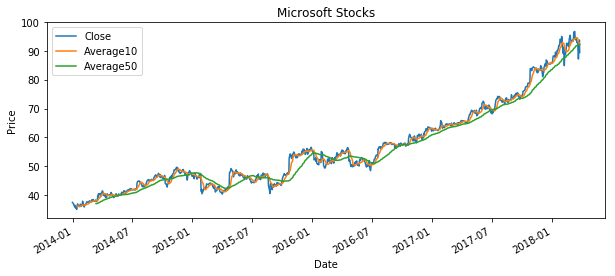

In [131]:
print(plt.style.available)

 
Microsoft[['Close','Average10','Average50']].plot(subplots=False, figsize=(10, 4),title = 'Microsoft Stocks')
plt.xlabel('Date')
plt.ylabel('Price')

In [137]:
Microsoft.isnull().values.any()

Microsoft.isnull().sum()


Open            0
High            0
Low             0
Close           0
Volume          0
Ex-Dividend     0
Split Ratio     0
Adj. Open       0
Adj. High       0
Adj. Low        0
Adj. Close      0
Adj. Volume     0
Average10       9
Average50      49
dtype: int64

In [149]:
from sklearn import preprocessing,  svm
from sklearn.linear_model import LinearRegression

from sklearn.metrics import recall_score
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
Microsoft = pd.DataFrame(imp.fit_transform(Microsoft),index = Microsoft.index, columns = Microsoft.columns)


In [142]:
forecast_vector = 'Close'
lag_pct = 0.01
forecast_shift = int(math.ceil(lag_pct*len(Microsoft)))
print(forecast_shift)

11


In [143]:
Microsoft['Label'] = Microsoft[forecast_vector].shift(-forecast_shift)
 
X = np.array(Microsoft.drop(['Label'],1))
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X_late = X[-forecast_shift:]
X = X[:-forecast_shift]
Microsoft.dropna(inplace=True)
Y = np.array(Microsoft['Label'])
 
print(len(X),len(Y))

1055 1055


In [172]:
#creating dataframe with date and the target variable
data = Microsoft.sort_index(ascending=True, axis=0)
new_data = Microsoft.DataFrame(index=range(0,len(Microsoft)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]


AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [169]:
Microsoft.reset_index(level=0, inplace = True)
Microsoft['Close'] = 0

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 16)

In [24]:
SP500 = quandl.get("WIKI/AS500",start_date="2013-12-31", end_date="2018-12-31")

NotFoundError: (Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.